In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [26]:
import os
import pickle
import numpy as np
from scipy import sparse
from functools import partial
from sklearn.externals import joblib
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [4]:
labels = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_labels.pkl")
features = joblib.load("/home/jovyan/persistent_data/data/dumps/labeled_corpus_matrix.pkl")
features = features.todense()
mozart_labels = [k for k in range(len(labels)) if labels[k] == "mozart"]
bach_labels = [k for k in range(len(labels)) if labels[k] == "bach-js"]
schubert_labels = [k for k in range(len(labels)) if labels[k] == "schubert"]
chopin_labels = [k for k in range(len(labels)) if labels[k] == "chopin"]
tchaikovsky_labels = [k for k in range(len(labels)) if labels[k] == "tchaikovsky"]
X = features[mozart_labels + bach_labels + schubert_labels + chopin_labels + tchaikovsky_labels].A
y = np.array([0 for i in range(len(mozart_labels))] + [1 for i in range(len(bach_labels))] + 
            [2 for i in range(len(schubert_labels))] + [3 for i in range(len(chopin_labels))] +
            [4 for i in range(len(tchaikovsky_labels))])
y = y.reshape((y.shape[0],))
del features

In [5]:
X = X[:,X.sum(axis=0).nonzero()[0]]

In [53]:
X.shape

(3776, 7616)

In [22]:
# mkdir dumps/logistic/l1

In [23]:
regularization_parameter = 1.0
predicted = []
actuals = []
lr_models = []
i = 0
for train_idx, test_idx in KFold(n=X.shape[0], n_folds=10, shuffle=True):
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    lr = LogisticRegression(penalty='l1', C=regularization_parameter)
    
    try:
        lr.fit(X_train, y_train)
    except:
        continue
    preds = lr.predict(X_test)
    predicted.append(preds)
    actuals.append(y_test)
    lr_models.append(lr)
    pickle.dump(lr_models, open("./dumps/logistic/l1/model_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(predicted, open("./dumps/logistic/l1/predicted_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    pickle.dump(actuals, open("./dumps/logistic/l1/actuals_fold_{fold}_reg_{reg}.pkl"
                                .format(fold=str(i), reg=str(regularization_parameter)), 'wb'))
    i += 1

In [24]:
from sklearn import metrics

In [35]:
model_folder = "/home/jovyan/persistent_data/midi-ml/notebooks/ProjectTwoResults/dumps/logistic/l1/"
accuracy = []
precision = []
recall = []
f1 = []
mcc = []
predicted = pickle.load(open(model_folder + "predicted_fold_9_reg_{reg}.pkl".format(reg=regularization_parameter), 'rb'))
actuals = pickle.load(open(model_folder + "actuals_fold_9_reg_{reg}.pkl".format(reg=regularization_parameter), 'rb'))
for preds, actual in zip(predicted, actuals):
    pred = preds
    print("confusion matrix")
    print(metrics.confusion_matrix(actual, pred))
    print("\taccuracy")
    acc = metrics.accuracy_score(actual, pred)
    accuracy.append(acc)
    print("\t\t", acc)
    print("\tf1")
    f = metrics.f1_score(actual, pred)
    f1.append(f)
    print("\t\t", f)
    print("\trecall")
    r = metrics.recall_score(actual, pred)
    recall.append(r)
    print("\t\t", r)
    print("\tprecision")
    p = metrics.precision_score(actual, pred)
    precision.append(p)
    print("\t\t", p)

confusion matrix
[[ 45  15   1   1   2]
 [  6 242   1   1   0]
 [  5   7   7   1   4]
 [  2   4   3   9   1]
 [  3   2   1   1  14]]
	accuracy
		 0.838624338624
	f1
		 0.826827748078
	recall
		 0.838624338624
	precision
		 0.82371458176
confusion matrix
[[ 49  17   0   0   1]
 [  2 216   1   1   2]
 [  3   0  26   2   5]
 [  1   2   1  14   2]
 [  1   3   6   2  21]]
	accuracy
		 0.862433862434
	f1
		 0.858801989007
	recall
		 0.862433862434
	precision
		 0.859061069249
confusion matrix
[[ 51  19   1   0   1]
 [  7 222   1   0   1]
 [  1   0  13   3   5]
 [  3   2   2  15   0]
 [  3   3   7   1  17]]
	accuracy
		 0.84126984127
	f1
		 0.836827215049
	recall
		 0.84126984127
	precision
		 0.836505670315
confusion matrix
[[ 55  14   1   1   0]
 [  3 238   0   1   2]
 [  2   2  15   1   3]
 [  0   2   1  17   1]
 [  3   4   1   0  11]]
	accuracy
		 0.888888888889
	f1
		 0.885140317683
	recall
		 0.888888888889
	precision
		 0.885314173153
confusion matrix
[[ 59   8   0   0   1]
 [ 11 225  

/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample

In [39]:
np.max(accuracy)

0.88888888888888884

In [33]:
import seaborn as sns
from scipy.stats.distributions import beta
def posterior_overlap_eval(actual, pred, labels, granularity=10000):
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
    tp_fn = []
    confusion = metrics.confusion_matrix(actual, pred)
    for i in range(confusion.shape[0]):
        tp = confusion[i,i]
        fn = np.delete(confusion[i,:], i).sum()
        tp_fn.append((tp, fn))
    betas = [beta(a=1 + tp, b = 1 + fn) for tp, fn in tp_fn]
    for i, beta_dist in enumerate(betas):
        random_draws = beta_dist.rvs(granularity)
        plt.hist(random_draws, alpha=0.2, color=colors[i], bins=np.linspace(0,1, 100))
        plt.vlines(random_draws.mean(), 0, 4000, label=labels[i], color=colors[i], linestyles="dotted")
    plt.legend(loc="upper left")
    plt.show()
labs = ["mozart", "bach", "schubert", "chopin", "tchaikovsky"]

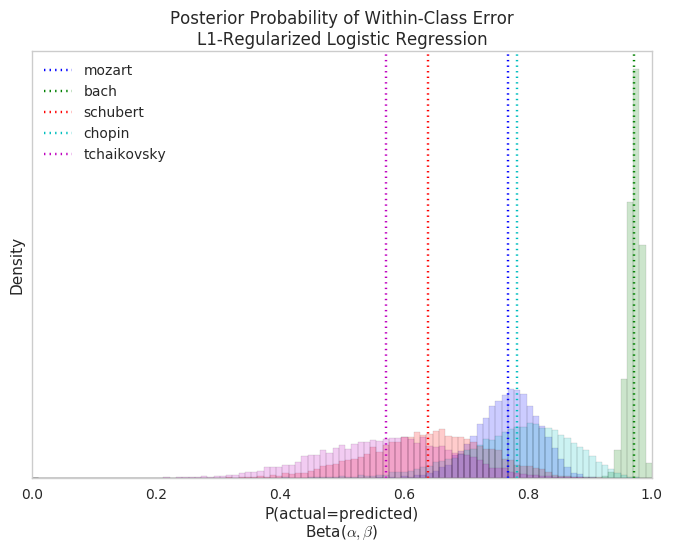

In [34]:
mymodel = "L1-Regularized Logistic Regression"
sns.set_style("whitegrid")
plt.title("Posterior Probability of Within-Class Error\n{model}".format(model=mymodel))
plt.xlabel('P(actual=predicted)\n' + r'Beta($\alpha, \beta$)')
plt.ylabel("Density")
plt.yticks([])
ax = plt.gca()
ax.grid(False)
posterior_overlap_eval(actual, pred, labels=labs)

In [50]:
labs

['mozart', 'bach', 'schubert', 'chopin', 'tchaikovsky']

In [45]:
betas = lr.coef_[0].copy()
sorted_b = np.argsort(betas)

In [49]:
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')

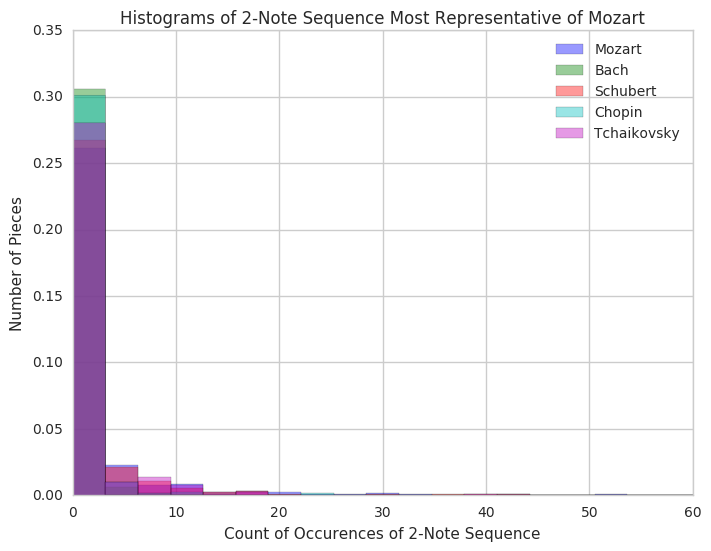

In [52]:
i = -1
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.hist(X[np.where(y == 0), sorted_b[i]][0], bins=np.linspace(0,60,20),
         color='b',
         alpha=0.4, label="Mozart", normed=True)
plt.hist(X[np.where(y == 1), sorted_b[i]][0], bins=np.linspace(0,60,20),
         color='g',
         alpha=0.4, label="Bach", normed=True)
plt.hist(X[np.where(y == 2), sorted_b[i]][0], bins=np.linspace(0,60,20),
         color='r',
         alpha=0.4, label="Schubert", normed=True)
plt.hist(X[np.where(y == 3), sorted_b[i]][0], bins=np.linspace(0,60,20),
         color='c',
         alpha=0.4, label="Chopin", normed=True)

plt.hist(X[np.where(y == 4), sorted_b[i]][0], bins=np.linspace(0,60,20),
         color='m',
         alpha=0.4, label="Tchaikovsky", normed=True)


plt.legend()
plt.title("Histograms of 2-Note Sequence Most Representative of Mozart")
plt.xlabel("Count of Occurences of 2-Note Sequence")
plt.ylabel("Number of Pieces")
plt.show()